# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Table of Contents:
- Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
- Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
- Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
- Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
- Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
- Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
- Question 7 - Sharing your Assignment Notebook - 2 Points

## Importing required libraries

In [1]:
!pip install pandas matplotlib seaborn --quiet
!pip install yfinance bs4 requests --quiet

In [2]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For better visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Question 1: Use yfinance to Extract Stock Data
Using the Ticker function enter the ***ticker*** symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is ***TSLA***.

In [3]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [4]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0
5,2010-07-07,3.280,3.326,2.996,3.160,34608500,0,0.0
6,2010-07-08,3.228,3.504,3.114,3.492,38557000,0,0.0
7,2010-07-09,3.516,3.580,3.310,3.480,20253000,0,0.0
8,2010-07-12,3.590,3.614,3.400,3.410,11012500,0,0.0
9,2010-07-13,3.478,3.728,3.380,3.628,13400500,0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping 
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [6]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

#Parsing data using Beautiful Soup
soup = BeautifulSoup(html_data,"html5lib")

Extracting data from the soup file into Pandas array.

In [7]:
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")

<ipython-input-7-c7218dee3db2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")


Checking the pasred values

In [8]:
tesla_revenue.head(10)

,Date,Revenue
0,2021-12-31,17719
1,2021-09-30,13757
2,2021-06-30,11958
3,2021-03-31,10389
4,2020-12-31,10744
5,2020-09-30,8771
6,2020-06-30,6036
7,2020-03-31,5985
8,2019-12-31,7384
9,2019-09-30,6303


Removing rows having the `Revenue` value NaN

In [9]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail(10)

,Date,Revenue
40,2011-12-31,39
41,2011-09-30,58
42,2011-06-30,58
43,2011-03-31,49
44,2010-12-31,36
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


## Question 3 - Extracting GameStop Stock Data Using yfinance 
Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [10]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [11]:
gme_data=gamestop.history(period="max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480514,6.773400,6.413184,6.766667,19054000,0.0,0.0
2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
2002-02-20,6.463680,6.648838,6.413182,6.648838,1723200,0.0,0.0


use a separate column to make `index`

In [12]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480514,6.773400,6.413184,6.766667,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463680,6.648838,6.413182,6.648838,1723200,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping 
Extracting the data from the link - [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue) and parse it into a `soup` file using `Beatiful_soup`.

In [13]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")

Extracting data from the `soup` file

In [14]:
gme_revenue= pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue=gme_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")

<ipython-input-14-68f064e7a6fd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")


In [15]:
gme_revenue.head(10)

,Date,Revenue
0,2021-10-31,1297
1,2021-07-31,1183
2,2021-04-30,1277
3,2021-01-31,2122
4,2020-10-31,1005
5,2020-07-31,942
6,2020-04-30,1021
7,2020-01-31,2194
8,2019-10-31,1439
9,2019-07-31,1286


Removing the rows if there exists any `Nan` value of `Revenue`

In [16]:
gme_revenue.dropna(inplace=True)
gme_revenue.info(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     52 non-null     object
 1   Revenue  52 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Question 5 - Tesla Stock and Revenue Dashboard


Preparing dataset for plotting

In [17]:
tesla_selected = tesla_data[["Date","Open","High","Low","Close"]].copy()
tesla_selected= tesla_selected.head(10)
tesla_selected.set_index("Date", inplace =True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

Plotting the data of `tesla_data` table that hold the data for the `Tesla Stock`

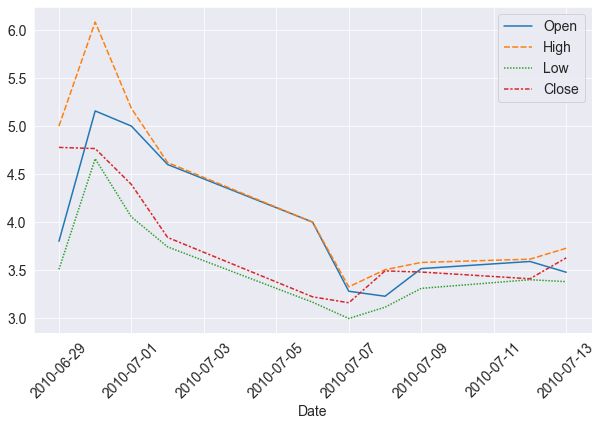

In [18]:
plt.xticks(rotation=45)
sns.lineplot(data=tesla_selected)
plt.show()

Plotting the data of `tesla_revenue` table that hold the data for the `Tesla Revenue`

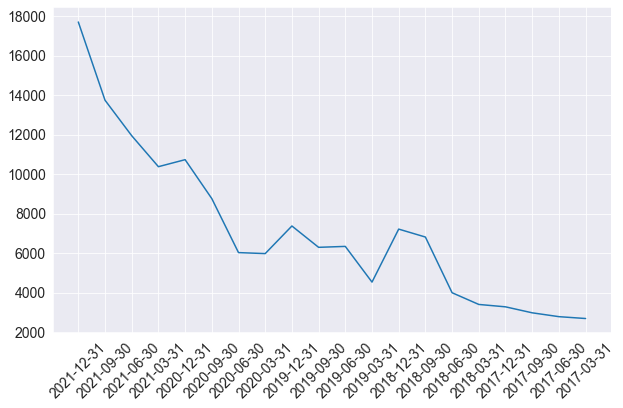

In [19]:
plt.xticks(rotation=45)
plt.plot(tesla_revenue["Date"].head(20), tesla_revenue["Revenue"].head(20))
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard

Preparing dataset for plotting

In [20]:
gme_selected = gme_data[["Date","Open","High","Low","Close"]].copy()
gme_selected= gme_selected.head(10)
gme_selected.set_index("Date", inplace =True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

Plotting the data of `gme_data` table that hold the data for the `GameStop Stock`

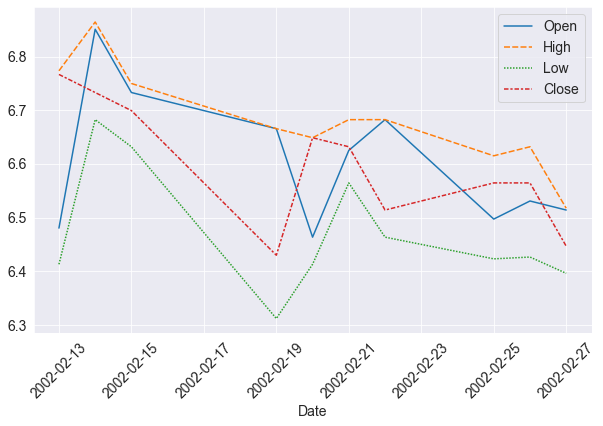

In [21]:
plt.xticks(rotation=45)
sns.lineplot(data=gme_selected)
plt.show()

Plotting the data of `gme_revenue` table that hold the data for the `GameStop Revenue`

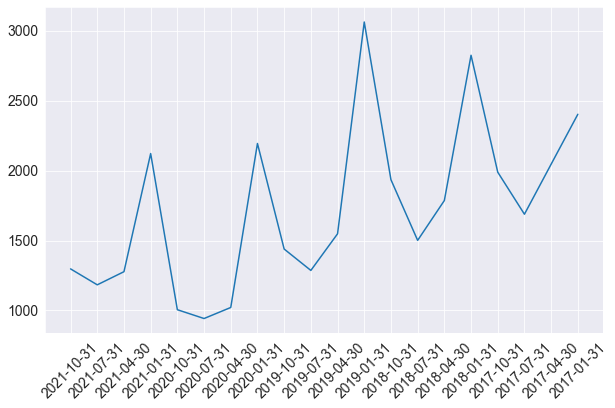

In [22]:
plt.xticks(rotation=45)
plt.plot(gme_revenue["Date"].head(20), gme_revenue["Revenue"].head(20))
plt.show()

## Conclusion
The works that has been done in this notebook so far -
-  Extracted Tesla Stock Data Using yfinance
-  Extracting Tesla Revenue Data Using Webscraping by BeautifulSoup
-  Extracting GameStop Stock Data Using yfinance
-  Extracting GameStop Revenue Data Using Webscraping by BeautifulSoup
-  Plotted Tesla Stock and Revenue Dashboard by Matplotlib and seaborn
-  Plotted GameStop Stock and Revenue Dashboard by Matplotlib and seaborn